# Baseline Modelle

In [1]:
#Laden der benötigten Bibliotheken
import pandas as pd
import numpy as np
import nltk   #Natural Language ToolKit
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Daten einlesen


In [2]:
data = pd.read_csv("")

In [3]:
data.head()

,id,created_at,username,name,user_id,body,basic_sentiment,symbol0,symbol1,symbol2,symbol3,symbol4
0,410821194,2021-11-28 12:28:21+00:00,chuckygorman,Chuck Gorman,1068147,$AAPL $BA $DIS,0,AAPL,BA,DIS,NaN,NaN
1,410821004,2021-11-28 12:25:13+00:00,Renohawk,jessie livermore,162218,$SPY $TSLA $MRNA $AAPL $NVDA \n\nMy thoughts o...,0,AAPL,MRNA,NVDA,SPY,TSLA
2,410820720,2021-11-28 12:19:36+00:00,newtwo99,PS not a bot!,813188,$AAPL $BA $DIS $UNH,0,AAPL,BA,DIS,UNH,NaN
3,410819818,2021-11-28 12:02:00+00:00,ChartMill,ChartMill,47688,The industry average Profit Margin is 4.39%. $...,0,AAPL,NaN,NaN,NaN,NaN
4,410819568,2021-11-28 11:56:23+00:00,OptionsPlayers,Steve /OptionsDayTrader77,619769,$AAPL $BA $DIS On the new Covid variant -\n\n&...,1,AAPL,BA,DIS,NaN,NaN


## Pre-Processing

In [4]:
#lower case
#data["tweets_preproc"] = data["body"].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [5]:
#html tags und urls raus
from bs4 import BeautifulSoup
data["tweets_preproc"]=data["body"].apply(lambda x: BeautifulSoup(x).get_text())
import re
data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x: re.sub(r"http\S+", "", x))

In [6]:
#kontrahieren: don't -> do not etc.
#def contractions(s):
# s = re.sub(r"won’t", "will not",s)
# s = re.sub(r"would’t", "would not",s)
# s = re.sub(r"could’t", "could not",s)
# s = re.sub(r"\’d", " would",s)
# s = re.sub(r"can\’t", "can not",s)
# s = re.sub(r"n\’t", " not", s)
# s= re.sub(r"\’re", " are", s)
# s = re.sub(r"\’s", " is", s)
# s = re.sub(r"\’ll", " will", s)
# s = re.sub(r"\’t", " not", s)
# s = re.sub(r"\’ve", " have", s)
# s = re.sub(r"\’m", " am", s)
# return s
#data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x:contractions(x))

In [7]:
#sonderzeichen etc. raus
#Ressourcen downloaden
#nltk.download('punkt')
#sonderzeichen etc. raus
data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [8]:
#überschüssige leerzeichen raus
data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x: re.sub(' +', ' ', x))

In [9]:
#fehlende Ressourcen downloaden
#nltk.download('stopwords')
#stopwords raus
#from nltk.corpus import stopwords
#stop = stopwords.words('english')
#data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [10]:
#lemmatization
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
#lemmatizer = WordNetLemmatizer()
#data["tweets_preproc"]=data["tweets_preproc"].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [11]:
#Datumsvariable erstellen - um ggf. spaeter Ergebnisse zu plotten
data["created_at"] = pd.to_datetime(data.created_at, format='%Y-%m-%d %H:%M:%S')
data['date'] = data['created_at'].dt.strftime('%m/%d/%Y')

In [12]:
#Prüfen, ob alles geklappt hat
data.head()

,id,created_at,username,name,user_id,body,basic_sentiment,symbol0,symbol1,symbol2,symbol3,symbol4,tweets_preproc,date
0,410821194,2021-11-28 12:28:21+00:00,chuckygorman,Chuck Gorman,1068147,$AAPL $BA $DIS,0,AAPL,BA,DIS,NaN,NaN,AAPL BA DIS,11/28/2021
1,410821004,2021-11-28 12:25:13+00:00,Renohawk,jessie livermore,162218,$SPY $TSLA $MRNA $AAPL $NVDA \n\nMy thoughts o...,0,AAPL,MRNA,NVDA,SPY,TSLA,SPY TSLA MRNA AAPL NVDA My thoughts on the st...,11/28/2021
2,410820720,2021-11-28 12:19:36+00:00,newtwo99,PS not a bot!,813188,$AAPL $BA $DIS $UNH,0,AAPL,BA,DIS,UNH,NaN,AAPL BA DIS UNH,11/28/2021
3,410819818,2021-11-28 12:02:00+00:00,ChartMill,ChartMill,47688,The industry average Profit Margin is 4.39%. $...,0,AAPL,NaN,NaN,NaN,NaN,The industry average Profit Margin is AAPL out...,11/28/2021
4,410819568,2021-11-28 11:56:23+00:00,OptionsPlayers,Steve /OptionsDayTrader77,619769,$AAPL $BA $DIS On the new Covid variant -\n\n&...,1,AAPL,BA,DIS,NaN,NaN,AAPL BA DIS On the new Covid variant It prese...,11/28/2021


In [13]:
#Datensatz nur mit gelabelten Tweets
data_labeled = data.drop(data[data.basic_sentiment == 0].index)
#nicht gelabelte Tweets für spätere Anwendungen
data_unlabeled = data.drop(data[data.basic_sentiment != 0].index)

## Sentiment Analysis

### 1 - VADER

Vorteile: </br>
- Braucht kein Training
- Funktioniert ohne gelabelte Daten
- speziell für Social Media (unterscheidet z.B. TOLL - toll - toll!)

Nachteile: </br>
- Liefert teilweise keine optimalen Ergebnisse
- Hat drei Klassen (neg/neutr/pos), Tweets haben nur zwei

In [14]:
#download vader lexikon (scheint in nltk zu fehlen (vllt. auch Problem mit anderem vader?))
#nltk.download('vader_lexicon')
#nltk vader
sid = SentimentIntensityAnalyzer()
#model
data_labeled["v_scores"] = data_labeled["tweets_preproc"].apply(lambda body: sid.polarity_scores(body))

In [15]:
#eigene Spalte für scores erstellen
data_labeled['compound']  = data_labeled['v_scores'].apply(lambda score_dict: score_dict['compound'])

In [16]:
#Predictions
data_labeled['v_sentiment'] = (
    np.where(
        data_labeled['compound'] > 0.05,1,
        np.where(data_labeled['compound'] < -0.05, -1, 0)))

In [17]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(data_labeled["basic_sentiment"], data_labeled["v_sentiment"])

array([[1355, 1999, 1340],
       [   0,    0,    0],
       [2715, 8743, 6748]], dtype=int64)

In [18]:
data_labeled["v_sentiment"].value_counts()

 0    10742
 1     8088
-1     4070
Name: v_sentiment, dtype: int64

### 2 - TF - IDF

Term-frequency - inverse document-frequency: $tf-idf(t,d) = tf(t,d) * idf(t)$ </br>
tf = Anzahl eines Wortes $t$ in einem Tweet/Dokument </br>
$idf(t) = log\frac{n}{1+df(t)}$ (sklearn weicht leicht von Standardformulierung ab)</br>
mit $n$ = Anzahl aller Tweets im Datensatz, $df(t)$ = Anzahl aller Tweets, die Wort $t$ enthalten. </br>
Tf-idf wird zusätzlich normalisiert: </br>
$v_{norm} = \frac{v}{||v||_{2}} = \frac{v}{\sqrt{v_{1}² + v_{2}² + ... + v_{n}²}}$ </br>

In [19]:
#train / test split mit gleichen Anteilen der Klassen in Trainings- und Testdaten
from sklearn.model_selection import train_test_split
baseline_train,baseline_test = train_test_split(data_labeled,
                                                  stratify = data_labeled["basic_sentiment"],
                                                  test_size=0.25, random_state=42)
print("Training Set: ",baseline_train.shape, "Test Set: ",baseline_test.shape)

Training Set:  (17175, 17) Test Set:  (5725, 17)


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
#Anwendung auf Training- und Testdaten
tf_x_train = vectorizer.fit_transform(baseline_train["tweets_preproc"])
tf_x_test = vectorizer.transform(baseline_test["tweets_preproc"])

In [21]:
tf_x_train

<17175x13974 sparse matrix of type '<class 'numpy.float64'>'
	with 232550 stored elements in Compressed Sparse Row format>

In [22]:
#pd.DataFrame.sparse.from_spmatrix(tf_x_train)

In [23]:
tf_x_test

<5725x13974 sparse matrix of type '<class 'numpy.float64'>'
	with 74767 stored elements in Compressed Sparse Row format>

In [24]:
#SVM classifier
#ohne grid search
from sklearn import svm
svm = svm.SVC(class_weight={1:20.5, -1:79.5})

In [25]:
#fitten
svm.fit(tf_x_train, baseline_train["basic_sentiment"])

SVC(class_weight={-1: 79.5, 1: 20.5})

In [26]:
#predictions
y_fit_svm_base = svm.predict(tf_x_test)

In [28]:
#ergebnisse /modellgüte
from sklearn.metrics import classification_report
svm_results_base = classification_report(baseline_test["basic_sentiment"], y_fit_svm_base, output_dict = True)

In [29]:
svm_results_base

{'-1': {'precision': 0.6890756302521008,
  'recall': 0.4194373401534527,
  'f1-score': 0.521462639109698,
  'support': 1173},
 '1': {'precision': 0.864098982239074,
  'recall': 0.9512302284710018,
  'f1-score': 0.9055735647809264,
  'support': 4552},
 'accuracy': 0.8422707423580786,
 'macro avg': {'precision': 0.7765873062455875,
  'recall': 0.6853337843122272,
  'f1-score': 0.7135181019453123,
  'support': 5725},
 'weighted avg': {'precision': 0.8282383024345815,
  'recall': 0.8422707423580786,
  'f1-score': 0.8268727585254939,
  'support': 5725}}

In [30]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': np.logspace(-3, 2, 6), 'kernel': ['linear']},
  {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel': ['rbf']},
 ]

grid_search = GridSearchCV(svm, param_grid, n_jobs = -1, verbose = 2)
grid_search.fit(tf_x_train, baseline_train["basic_sentiment"])

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=SVC(class_weight={-1: 79.5, 1: 20.5}), n_jobs=-1,
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['linear']},
                         {'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                          'kernel': ['rbf']}],
             verbose=2)

In [31]:
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}


In [32]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model_svm = grid_search.best_estimator_
y_fit_svm = model_svm.predict(tf_x_test)
baseline_test["sentiment_svm"] = y_fit_svm

In [33]:
#ergebnisse /modellgüte
svm_results=classification_report(baseline_test["basic_sentiment"], y_fit_svm,output_dict=True)

In [34]:
svm_results

{'-1': {'precision': 0.6792452830188679,
  'recall': 0.4296675191815857,
  'f1-score': 0.5263707571801567,
  'support': 1173},
 '1': {'precision': 0.8657435279951836,
  'recall': 0.9477152899824253,
  'f1-score': 0.9048767697954903,
  'support': 4552},
 'accuracy': 0.8415720524017467,
 'macro avg': {'precision': 0.7724944055070257,
  'recall': 0.6886914045820055,
  'f1-score': 0.7156237634878235,
  'support': 5725},
 'weighted avg': {'precision': 0.8275317478454511,
  'recall': 0.8415720524017467,
  'f1-score': 0.8273243588264446,
  'support': 5725}}

   precision = tp / (tp + fp) </br>
   recall / sensitivity = tp / (tp + fn) </br>
   F1 = 2 * (precision * recall) / (precision + recall)

In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Base model
rf = RandomForestClassifier(random_state = 42, class_weight={1:20.5, -1:79.5})

In [37]:
#fit base model
rf.fit(tf_x_train, baseline_train["basic_sentiment"])

RandomForestClassifier(class_weight={-1: 79.5, 1: 20.5}, random_state=42)

In [38]:
#predictions
y_fit_rf_base = rf.predict(tf_x_test)
baseline_test["sentiment_rf"] = y_fit_rf

In [40]:
#ergebnisse /modellgüte
rf_results=classification_report(baseline_test["basic_sentiment"], y_fit_rf,output_dict=True)

In [41]:
rf_results

{'-1': {'precision': 0.735981308411215,
  'recall': 0.26854219948849106,
  'f1-score': 0.3935040599625234,
  'support': 1173},
 '1': {'precision': 0.8380215216160091,
  'recall': 0.9751757469244289,
  'f1-score': 0.9014113107929739,
  'support': 4552},
 'accuracy': 0.8303930131004367,
 'macro avg': {'precision': 0.787001415013612,
  'recall': 0.62185897320646,
  'f1-score': 0.6474576853777486,
  'support': 5725},
 'weighted avg': {'precision': 0.8171144176702931,
  'recall': 0.8303930131004367,
  'f1-score': 0.7973457727625601,
  'support': 5725}}

In [ ]:
#grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
param_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search_rf = GridSearchCV(rf, param_grid_rf, n_jobs = -1, verbose = 2)
grid_search_rf.fit(tf_x_train, baseline_train["basic_sentiment"])

In [ ]:
#Bestes Modell auf Testdaten anwenden und fitted values speichern
model_rf = grid_search_rf.best_estimator_
y_fit_rf = model_rf.predict(tf_x_test)
baseline_test["sentiment_rf"] = y_fit_rf

### Zusammenfassung:

    VADER: funtkioniert nicht gut
    TF_IDF: liefert für positive Tweets gute Ergebnisse; negative Tweets werden nicht gut erkannt

ToDo: </br>
pre-processing korrekt? </br>
Ergebnisse schöner darstellen




## Ergebnisse plotten

kurzer Versuch, die Predictions zu aggregieren, daraus einen Sentiment Score für einen Tag zu berechnen und diesen zu plotten

In [44]:
#function to create dummy variables and add them to the dataframe
def dummies(dataframe, columns):
    dummy_df = pd.get_dummies(data = dataframe, columns = columns, dtype = np.float64)
    return dummy_df

In [46]:
baseline_train = dummies(baseline_train, ['basic_sentiment'])
dummy_vars = ['basic_sentiment','sentiment_svm']
baseline_test = dummies(baseline_test, dummy_vars)

In [49]:
#aggregation
sentiment_scores_train = baseline_train.groupby("date").agg({'basic_sentiment_-1': sum,
                                                      'basic_sentiment_1': sum}) 

In [51]:
#aggregation
sentiment_scores_test = baseline_test.groupby("date").agg({'basic_sentiment_-1': sum,
                                                    'basic_sentiment_1': sum,
                                                   'sentiment_svm_-1': sum,
                                                   'sentiment_svm_1':sum}) 

In [52]:
sentiment_scores_test["avg_svm"] = (sentiment_scores_test["sentiment_svm_1"] - sentiment_scores_test["sentiment_svm_-1"])/((sentiment_scores_test["sentiment_svm_1"] + sentiment_scores_test["sentiment_svm_-1"]))

In [53]:
sentiment_scores_test["avg_base"] = (sentiment_scores_test["basic_sentiment_1"] - sentiment_scores_test["basic_sentiment_-1"])/((sentiment_scores_test["sentiment_svm_1"] + sentiment_scores_test["sentiment_svm_-1"]))

In [54]:
#create date variable from index
sentiment_scores_test["date"] = sentiment_scores_test.index

In [80]:
sentiment_scores_test["date"] = pd.to_datetime(sentiment_scores_test.date, format='%m/%d/%Y')

In [56]:
sentiment_scores_test.head()

,basic_sentiment_-1,basic_sentiment_1,sentiment_svm_-1,sentiment_svm_1,avg_svm,avg_base,date
date,,,,,,,
10/12/2021,56.0,85.0,27.0,114.0,0.617021,0.205674,10/12/2021
10/13/2021,56.0,136.0,39.0,153.0,0.593750,0.416667,10/13/2021
10/14/2021,32.0,120.0,26.0,126.0,0.657895,0.578947,10/14/2021
10/15/2021,17.0,84.0,12.0,89.0,0.762376,0.663366,10/15/2021
10/16/2021,2.0,14.0,3.0,13.0,0.625000,0.750000,10/16/2021


In [62]:
#plotting
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

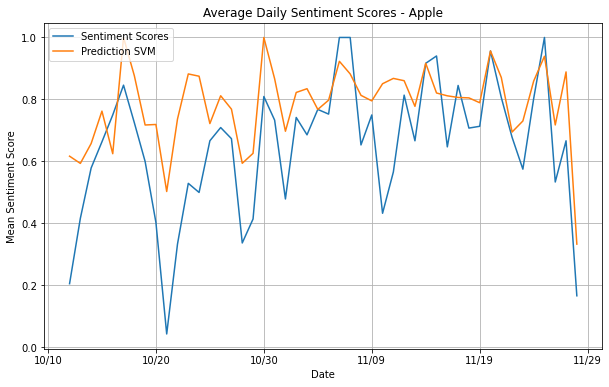

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(sentiment_scores_test["date"],sentiment_scores_test.avg_base, label = 'Sentiment Scores')
ax.plot(sentiment_scores_test["date"], sentiment_scores_test["avg_svm"], label = 'Prediction SVM')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Average Daily Sentiment Scores - Apple')
ax.grid(True)
ax.legend(loc='upper left');

#format date axis
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)
#change interval 
ax.xaxis.set_major_locator(ticker.AutoLocator())